# Data 

### Import Data

In [1]:
import os
import pandas as pd

In [2]:
os.getcwd()

'C:\\Users\\Ki Yoon Yoo\\Desktop\\투빅스\\1주차\\Assignment\\부동산경매'

In [3]:
df = pd.read_csv('Auction_master/Auction_master_train.csv')

In [4]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [5]:
df.shape

(1933, 41)

## Data Exploration

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
#for using Korean font
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

None

In [9]:
display(df.describe())

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


In [10]:
len(set(df['Appraisal_company']))

238

# Data Preprocessing

#### 범주형 변수 처리

In [11]:
categorical_col = list(df.select_dtypes(include='object').columns)

In [12]:
categorical_col

['Auction_class',
 'Bid_class',
 'Appraisal_company',
 'Appraisal_date',
 'First_auction_date',
 'Final_auction_date',
 'Final_result',
 'Creditor',
 'addr_do',
 'addr_si',
 'addr_dong',
 'addr_li',
 'addr_san',
 'addr_etc',
 'Apartment_usage',
 'Preserve_regist_date',
 'Specific',
 'Share_auction_YorN',
 'road_name',
 'Close_date',
 'Close_result']

In [13]:
#범주형 변수 unique 값 개수 
for col in categorical_col:
    print(col+ ':  ',len(set(df[str(col)])))

Auction_class:   2
Bid_class:   3
Appraisal_company:   238
Appraisal_date:   712
First_auction_date:   498
Final_auction_date:   405
Final_result:   1
Creditor:   448
addr_do:   2
addr_si:   39
addr_dong:   285
addr_li:   10
addr_san:   2
addr_etc:   1929
Apartment_usage:   2
Preserve_regist_date:   1256
Specific:   56
Share_auction_YorN:   2
road_name:   1038
Close_date:   389
Close_result:   2


In [14]:
# (날짜를 제외하고) 범주형 변수 중 unique 값이 10개 이상인 
# Appraisal_company, Creditor, addr_si, addr_dong, addr_dong, addr_li, Specific, road_name,
del df['Appraisal_company']
del df['Creditor']
del df['addr_si']
del df['addr_dong']
del df['addr_li']
del df['Specific']
del df['road_name']
del df['addr_etc']


In [15]:
# 예측에 의미 없는 FInal result
del df['Final_result']
del df['Auction_key']

In [ ]:
#위치에 대한 정보는 서울/부산이 충분하다고 가정; 구체적 주소인 road_bunji2 는 제거
del processed_df['road_bunji2']

In [16]:
set(df.Share_auction_YorN)

{'N', 'Y'}

In [17]:
set(df.Auction_class)

{'강제', '임의'}

In [18]:
df.addr_do.replace({'부산':0, '서울':1},inplace=True)
df.Apartment_usage.replace({'주상복합':0, '아파트':1},inplace=True)
df.Close_result.replace({'    ':0,'배당':1}, inplace=True)
df.Bid_class.replace({'개별':0,'일괄':1,'일반':2}, inplace=True)
df.Share_auction_YorN.replace({'N':0,'Y':1}, inplace=True)

In [19]:
df.addr_san.replace({'N':0,'Y':1},inplace=True)
df.Auction_class.replace({'강제':0,'임의':1},inplace=True)

#### 날짜 변수 처리

In [20]:
#Julian Date 로 변환하는 함수
import math

def date_to_jd(date):
    """
    Convert a date to Julian Day.
    
    Algorithm from 'Practical Astronomy with your Calculator or Spreadsheet', 
        4th ed., Duffet-Smith and Zwart, 2011.
    
    Parameters
    ----------
    year : int
        Year as integer. Years preceding 1 A.D. should be 0 or negative.
        The year before 1 A.D. is 0, 10 B.C. is year -9.
        
    month : int
        Month as integer, Jan = 1, Feb. = 2, etc.
    
    day : float
        Day, may contain fractional part.
    
    Returns
    -------
    jd : float
        Julian Day
        
    Examples
    --------
    Convert 6 a.m., February 17, 1985 to Julian Day
    
    >>> date_to_jd(1985,2,17.25)
    2446113.75
    
    """
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])
    if month == 1 or month == 2:
        yearp = year - 1
        monthp = month + 12
    else:
        yearp = year
        monthp = month
    
    # this checks where we are in relation to October 15, 1582, the beginning
    # of the Gregorian calendar.
    if ((year < 1582) or
        (year == 1582 and month < 10) or
        (year == 1582 and month == 10 and day < 15)):
        # before start of Gregorian calendar
        B = 0
    else:
        # after start of Gregorian calendar
        A = math.trunc(yearp / 100.)
        B = 2 - A + math.trunc(A / 4.)
        
    if yearp < 0:
        C = math.trunc((365.25 * yearp) - 0.75)
    else:
        C = math.trunc(365.25 * yearp)
        
    D = math.trunc(30.6001 * (monthp + 1))
    
    jd = B + C + D + day + 1720994.5
    
    return jd

In [21]:
date_ = '1996-12-30'

In [22]:
date_to_jd(date_)

2450447.5

In [23]:
df['Appraisal_jdate']= df['Appraisal_date'].apply(date_to_jd)
df['First_auction_jdate'] = df['First_auction_date'].apply(date_to_jd)
df['Final_auction_jdate'] = df['Final_auction_date'].apply(date_to_jd)
df['Close_jdate'] = df['Close_date'].apply(date_to_jd)
df['Preserve_regist_jdate'] = df['Preserve_regist_date'].apply(date_to_jd)

In [24]:
del df['Appraisal_date']
del df['First_auction_date']
del df['Final_auction_date']
del df['Close_date']
del df['Preserve_regist_date']


In [25]:
df.columns

Index(['Auction_class', 'Bid_class', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'addr_do', 'addr_san',
       'addr_bunji1', 'addr_bunji2', 'Apartment_usage', 'Total_floor',
       'Current_floor', 'Share_auction_YorN', 'road_bunji1', 'road_bunji2',
       'Close_result', 'point.y', 'point.x', 'Hammer_price', 'Appraisal_jdate',
       'First_auction_jdate', 'Final_auction_jdate', 'Close_jdate',
       'Preserve_regist_jdate'],
      dtype='object')

#### Label 과 연속변수들간 correlation 

In [26]:
#연속형 변수 label과 상관계수 본다음 정렬하기(ascending=False는 내림차순)
corr_matrix = df.corr()
corr = abs(corr_matrix["Hammer_price"]).sort_values(ascending=False)

In [27]:
corr

Hammer_price                   1.000000
Minimum_sales_price            0.994592
Total_appraisal_price          0.953464
Total_building_auction_area    0.772839
Total_building_area            0.768454
Total_land_auction_area        0.700639
Total_land_real_area           0.696099
addr_do                        0.306488
point.x                        0.296312
point.y                        0.295698
Claim_price                    0.267728
Total_floor                    0.220830
road_bunji2                    0.206681
Current_floor                  0.198013
Share_auction_YorN             0.091157
Preserve_regist_jdate          0.074827
Total_land_gross_area          0.070466
addr_san                       0.068954
Auction_class                  0.054813
road_bunji1                    0.020404
Appraisal_jdate                0.020075
Auction_count                  0.016999
First_auction_jdate            0.012063
Auction_miscarriage_count      0.011296
Apartment_usage                0.004344


In [28]:
# 상관계수가 낮은 15개 feature 삭제 
low_cor_index = corr.tail(15).index

In [29]:
processed_df = df.drop(list(low_cor_index), axis =1 )

In [30]:
processed_df.columns

Index(['Claim_price', 'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'addr_do',
       'Total_floor', 'Current_floor', 'Share_auction_YorN', 'road_bunji2',
       'point.y', 'point.x', 'Hammer_price', 'Preserve_regist_jdate'],
      dtype='object')

#### Autocorrelation 이 존재하는 변수 제거

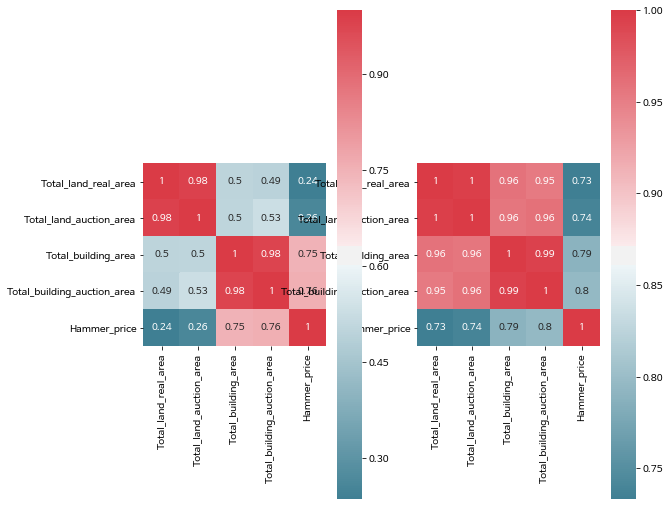

In [31]:
#correlation heatmap
area_list = ['Total_land_real_area', 'Total_land_auction_area', 'Total_building_area', 'Total_building_auction_area', 'Hammer_price']
processed_df[area_list][processed_df.addr_do == 0].corr()
f, ax = plt.subplots(ncols=2, figsize=(9, 9))
sns.heatmap(processed_df[area_list][processed_df.addr_do == 0].corr(), mask=np.zeros_like(processed_df[area_list][processed_df.addr_do == 0].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0], annot=True)
sns.heatmap(processed_df[area_list][processed_df.addr_do == 1].corr(), mask=np.zeros_like(processed_df[area_list][processed_df.addr_do == 1].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1], annot=True)

In [32]:
del processed_df['Total_land_auction_area']
del processed_df['Total_building_area']

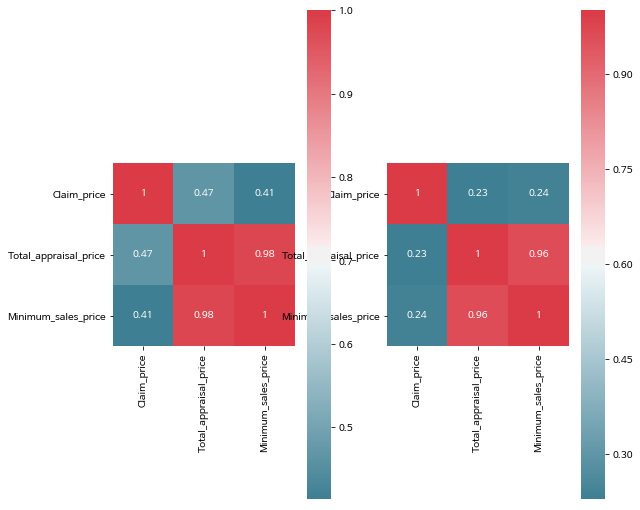

In [33]:
#correlation heatmap

price_list = ['Claim_price','Total_appraisal_price','Minimum_sales_price'] 
processed_df[price_list][processed_df.addr_do == 0].corr()
f, ax = plt.subplots(ncols=2, figsize=(9, 9))
sns.heatmap(processed_df[price_list][processed_df.addr_do == 0].corr(), mask=np.zeros_like(processed_df[price_list][processed_df.addr_do == 0].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0], annot=True)
sns.heatmap(processed_df[price_list][processed_df.addr_do == 1].corr(), mask=np.zeros_like(processed_df[price_list][processed_df.addr_do == 1].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1], annot=True)

In [34]:
del processed_df['Total_appraisal_price']

#### 파생변수 생성

In [35]:
#매물물건 층 수/ 전체 건물 층수 
processed_df['floor_prop'] = processed_df['Current_floor']/processed_df['Total_floor']
# 경매신청인의 청구금액 - 감정가 
processed_df['price_diff'] = df['Claim_price'] - df['Total_appraisal_price']

## Selected features 시각화

In [112]:
sel_features = list(processed_df.columns)
sel_features

['Claim_price',
 'Total_land_real_area',
 'Total_building_auction_area',
 'Minimum_sales_price',
 'addr_do',
 'Total_floor',
 'Current_floor',
 'Share_auction_YorN',
 'point.y',
 'point.x',
 'Preserve_regist_jdate',
 'floor_prop',
 'price_diff',
 'Hammer_price']

In [113]:
price_features = [i for i in sel_features if 'price' in i]
price_features.remove('Hammer_price')
area_features = [i for i in sel_features if 'area' in i]
etc_features = [i for i in sel_features if i not in price_features]
etc_features = [i for i in etc_features if i not in area_features]

In [128]:
price_features

['Claim_price', 'Minimum_sales_price', 'price_diff']

In [114]:
area_features

['Total_land_real_area', 'Total_building_auction_area']

In [115]:
etc_features

['addr_do',
 'Total_floor',
 'Current_floor',
 'Share_auction_YorN',
 'point.y',
 'point.x',
 'Preserve_regist_jdate',
 'floor_prop']

In [148]:
corr_matrix = processed_df.corr()
corr = abs(corr_matrix["Hammer_price"]).sort_values(ascending=False)
corr

Hammer_price                   1.000000
Minimum_sales_price            0.994592
Total_building_auction_area    0.772839
Total_land_real_area           0.696099
addr_do                        0.306488
point.x                        0.296312
point.y                        0.295698
price_diff                     0.285878
Claim_price                    0.267728
Total_floor                    0.220830
Current_floor                  0.198013
Share_auction_YorN             0.091157
Preserve_regist_jdate          0.074827
floor_prop                     0.008581
Name: Hammer_price, dtype: float64

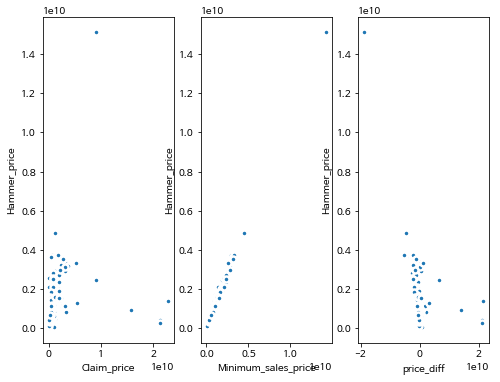

In [125]:
#price feature vs. Hammer price for Seoul
fig, axs = plt.subplots(ncols=len(price_features), figsize=(8, 6))

cnt = 0
for fea in price_features:    
    sns.scatterplot(x=str(fea),y = 'Hammer_price' ,data=processed_df[processed_df.addr_do == 1], linewidth=2.5, ax=axs[cnt])
    cnt +=1


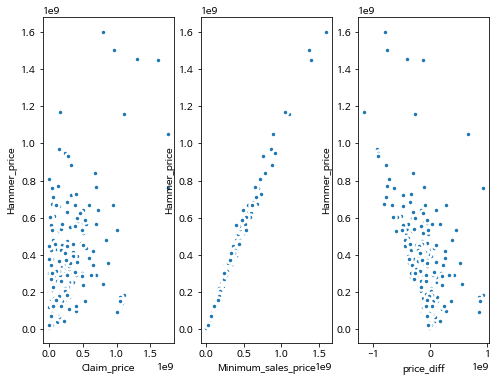

In [131]:
#price feature vs. Hammer price for Busan
fig, axs = plt.subplots(ncols=len(price_features), figsize=(8, 6))

cnt = 0
for fea in price_features:    
    sns.scatterplot(x=str(fea),y = 'Hammer_price' ,data=processed_df[processed_df.addr_do == 0], linewidth=2.5, ax=axs[cnt])
    cnt +=1


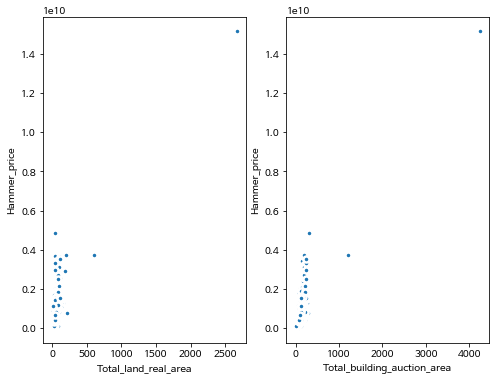

In [126]:
#area feature vs. Hammer price for Seoul
fig, axs = plt.subplots(ncols=len(area_features), figsize=(8, 6))

cnt = 0
for fea in area_features:    
    sns.scatterplot(x=str(fea),y = 'Hammer_price' ,data=processed_df[processed_df.addr_do == 1], linewidth=2.5, ax=axs[cnt])
    cnt +=1


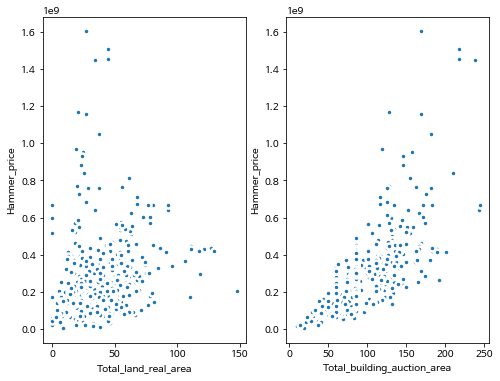

In [132]:
#area feature vs. Hammer price for Busan
fig, axs = plt.subplots(ncols=len(area_features), figsize=(8, 6))

cnt = 0
for fea in area_features:    
    sns.scatterplot(x=str(fea),y = 'Hammer_price' ,data=processed_df[processed_df.addr_do == 0], linewidth=2.5, ax=axs[cnt])
    cnt +=1


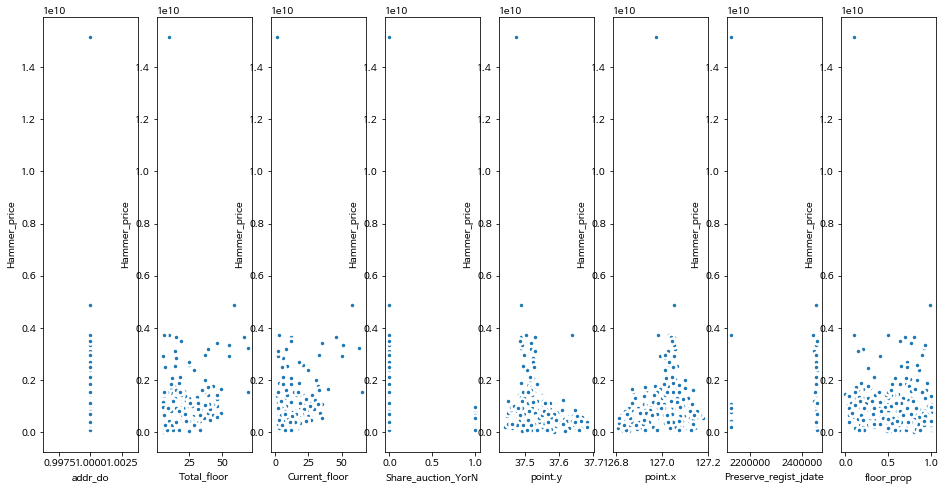

In [134]:
#etc feature vs. Hammer price for Seoul
fig, axs = plt.subplots(ncols=len(etc_features), figsize=(16, 8))

cnt = 0
for fea in etc_features:    
    sns.scatterplot(x=str(fea),y = 'Hammer_price' ,data=processed_df[processed_df.addr_do == 1], linewidth=2.5, ax=axs[cnt])
    cnt +=1


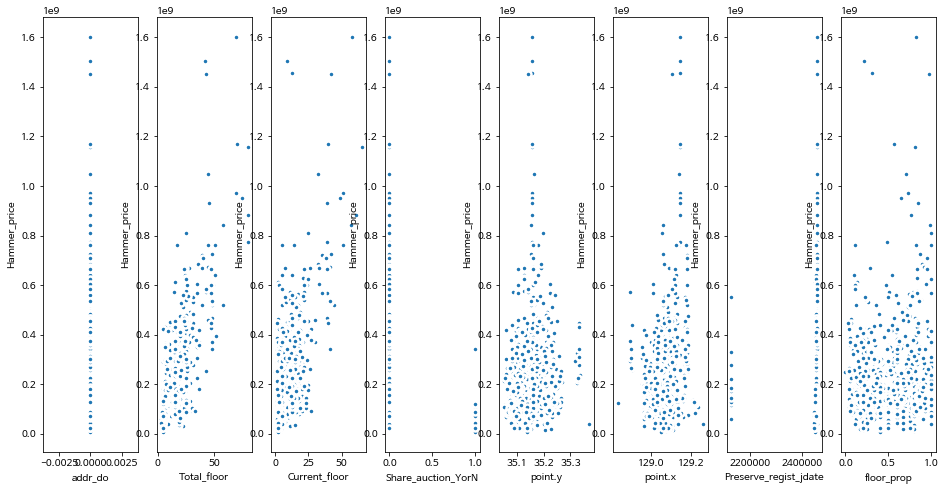

In [133]:
#etc feature vs. Hammer price for Busan
fig, axs = plt.subplots(ncols=len(etc_features), figsize=(16, 8))

cnt = 0
for fea in etc_features:    
    sns.scatterplot(x=str(fea),y = 'Hammer_price' ,data=processed_df[processed_df.addr_do == 0], linewidth=2.5, ax=axs[cnt])
    cnt +=1


In [ ]:
#correlation heatmap


processed_df[price_list][processed_df.addr_do == 0].corr()
f, ax = plt.subplots(ncols=2, figsize=(9, 9))
sns.heatmap(processed_df[price_list][processed_df.addr_do == 0].corr(), mask=np.zeros_like(processed_df[price_list][processed_df.addr_do == 0].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0], annot=True)
sns.heatmap(processed_df[price_list][processed_df.addr_do == 1].corr(), mask=np.zeros_like(processed_df[price_list][processed_df.addr_do == 1].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1], annot=True)

# Linear Regression Model 

In [135]:
X = processed_df.drop('Hammer_price',axis=1)
y = df.Hammer_price 

In [136]:
y = np.array(y).reshape(-1,1)

In [137]:
X = pd.get_dummies(X)

In [138]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,y)
model.score(X,y)

### Overfitting Expected

0.9901294353744272

In [139]:
from sklearn.model_selection import cross_validate as CV

#Ten-fold validation , score metric = negative mean squared error 
score = CV(model,X, y, cv=10, scoring='neg_mean_squared_error')

In [145]:
rmse = (score['test_score'] * -1) **(1/2)

In [146]:
rmse.mean()

68373791.42190401